Import Required Libraries

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import shapefile as shp
import os

Import 3 Datasets contaning Parking Data

In [15]:
df1 = pd.read_csv(r'C:\Users\NAVJOT\Desktop\PAIE_Job_search\OCT 2019\City of troronto\parking tickets\Parking_Tags_Data_2018_1.csv',)
df1.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***92517,20180101,16,PARK-WITHIN 9M INTERSECT ROAD,50,0.0,S/S,PRYOR AVE,E/O,CLOVERDALE RD,ON
1,***71708,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,266 DOVERCOURT RD,NaN,NaN,ON
2,***92311,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,15 FAIRBANK AVE,NaN,NaN,ON
3,***92312,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,15 FAIRBANK AVE,NaN,NaN,ON
4,***71709,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,3.0,NR,266 DOVERCOURT RD,NaN,NaN,ON


In [62]:
df2 = pd.read_csv(r'C:\Users\NAVJOT\Desktop\PAIE_Job_search\OCT 2019\City of troronto\parking tickets\Parking_Tags_Data_2018_2.csv',)
df2.tail()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
749995,***65904,20180929,3,PARK ON PRIVATE PROPERTY,30,2230.0,NaN,3101 WESTON RD,NaN,NaN,ON
749996,***11580,20180929,8,STAND VEH.-PROHIBIT TIME/DAY,60,2230.0,W/S,GRANGEWAY AVE,N/O,ELLESMERE RD,ON
749997,***16677,20180929,30,STOP-(ON/OVER) (SIDEWK/FTPATH),150,2230.0,NR,97 MAITLAND ST,NaN,NaN,ON
749998,***16678,20180929,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2231.0,NR,82 MAITLAND ST,NaN,NaN,ON
749999,***65905,20180929,3,PARK ON PRIVATE PROPERTY,30,2232.0,NaN,3101 WESTON RD,NaN,NaN,ON


In [17]:
df3 = pd.read_csv(r'C:\Users\NAVJOT\Desktop\PAIE_Job_search\OCT 2019\City of troronto\parking tickets\Parking_Tags_Data_2018_3.csv',)
df3.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***91886,20180929,2,PARK - LONGER THAN 3 HOURS,15,2233.0,W/S,RUMNEY RD,N/O,TRENTON AVE,ON
1,***18291,20180929,207,PARK MACHINE-REQD FEE NOT PAID,30,2233.0,NR,390 QUEEN ST W,NaN,NaN,ON
2,***26058,20180929,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2233.0,NR,10 EDWARD ST,NaN,NaN,ON
3,***16679,20180929,29,PARK PROHIBITED TIME NO PERMIT,30,2234.0,NR,55 MAITLAND ST,NaN,NaN,ON
4,***18292,20180929,406,PARK-VEH. W/O VALID ONT PLATE,40,2234.0,NR,390 QUEEN ST W,NaN,NaN,ON


Datasets Shape Exploration

In [18]:
df1.shape

(750000, 11)

In [19]:
df2.shape

(750000, 11)

In [20]:
df3.shape

(544288, 11)

Merge all the above three Parking ticket Datasets (df1,df2,df3) to single Dataset R1

In [43]:
frames = [df1, df2, df3]

In [44]:
R1 = pd.concat(frames)

In [45]:
R1.tail()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
544283,***00696,20181231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,282 GILLARD AVE,NaN,NaN,ON
544284,***43620,20181231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,1404 DANFORTH AVE,NaN,NaN,ON
544285,***29024,20181231,3,PARK ON PRIVATE PROPERTY,30,2358.0,AT,2110 KEELE ST,NaN,NaN,ON
544286,***28387,20181231,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2359.0,NR,40 SPRING GARDEN AVE,NaN,NaN,ON
544287,***43621,20181231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2359.0,NR,1316 DANFORTH AVE,NaN,NaN,ON


In [46]:
R1.shape

(2044288, 11)

In [47]:
R1.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code             int64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

Data Cleaning

In [61]:
#Checking for NA values to replace
var = pd.DataFrame({'Number of NA' : R1.isna().sum(),'Value Type':R1.dtypes})
print('Data Shape', R1.shape)
var

Data Shape (2044288, 12)


,Number of NA,Value Type
tag_number_masked,0,object
date_of_infraction,0,int64
infraction_code,0,int64
infraction_description,0,object
set_fine_amount,0,int64
time_of_infraction,1532,float64
location1,185747,object
location2,173,object
location3,1903837,object
location4,1903301,object


location1, location3, location 4 and time_of_infraction columns are not required for analysis, so these will be removed. Also, rows which contains no value for location2 will also be reomoved

In [65]:
R2=R1.drop(columns=['time_of_infraction', 'location1', 'location3', 'location4'])

In [69]:
R2.dropna()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,location2,province,DateTime
0,***92517,20180101,16,PARK-WITHIN 9M INTERSECT ROAD,50,PRYOR AVE,ON,2018-01-01
1,***71708,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,266 DOVERCOURT RD,ON,2018-01-01
2,***92311,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,15 FAIRBANK AVE,ON,2018-01-01
3,***92312,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,15 FAIRBANK AVE,ON,2018-01-01
4,***71709,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,266 DOVERCOURT RD,ON,2018-01-01
5,***73023,20180101,3,PARK ON PRIVATE PROPERTY,30,735 COLLEGE ST,ON,2018-01-01
6,***73024,20180101,3,PARK ON PRIVATE PROPERTY,30,735 COLLEGE ST,ON,2018-01-01
7,***92313,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,15 FAIRBANK AVE,ON,2018-01-01
8,***71710,20180101,29,PARK PROHIBITED TIME NO PERMIT,30,262 DOVERCOURT RD,ON,2018-01-01
9,***73025,20180101,3,PARK ON PRIVATE PROPERTY,30,735 COLLEGE ST,ON,2018-01-01


Create New DateTime Column from date_of_infraction column

In [72]:
R2['DateTime'] = R2['date_of_infraction'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))


Create New Day_of_week Column from DateTime

In [74]:
R2['day_of_week'] = R2['DateTime'].dt.weekday_name

Create new month_year column from DateTime

In [77]:
R2['month_year'] = R2['DateTime'].dt.month_name()

Create new season column from month_year column

In [91]:
def getSeason(month_year):
    if (month_year == "December" or month_year == "January" or month_year == "February"):
        return "Winter"
    elif (month_year == "March" or month_year == "April" or month_year == "May"):
        return "Spring"
    elif (month_year == "June" or month_year == "July" or month_year == "August"):
        return "Summer"
    else:
        return "Fall"
    
R2['season'] = R2.month_year.map(getSeason)

In [79]:
R2['infraction_description'].unique()

array(['PARK-WITHIN 9M INTERSECT ROAD', 'PARK PROHIBITED TIME NO PERMIT',
       'PARK ON PRIVATE PROPERTY', 'STOP-SIGNED HWY-PROHIBIT TM/DY',
       'PARK-SIGNED HWY-PROHIBIT DY/TM', 'STAND VEH.-PROHIBIT TIME/DAY',
       'STND ONSTRT ACCESSIBLE NO PRMT', 'PARK-WITHIN 3M OF FIRE HYDRANT',
       'PARK-VEH. W/O VALID ONT PLATE', 'PARK-FAIL TO DISPLAY PERMIT',
       'STOP VEH OTR THN BCYCL-BYCL LN', 'FAIL TO PARK/STOP PARALL. CURB',
       'STAND SIGNED TRANSIT STOP', 'PARK-OBSTRUCT (DRWAY/LANEWAY)',
       'PARK-N.YORK 2AM-6AM DEC1-MAR31', 'PARK ON MUNICIPAL PROPERTY',
       'PARK IN A FIRE ROUTE', 'STOP-ROAD SIDE-STOP/PARK VEH.',
       'STOP-(ON/OVER) (SIDEWK/FTPATH)', 'FAIL TO PARK/STOP PARALL. RGHT',
       'PARK-W/O VALID NON-ONT PLATE', 'PARK/STAND UNAUTH VEH. CAR SHR',
       'PARK-(FRNT/60 CM) DRWAY/LANEWY', 'STAND VEH.-PSGR LD ZN LD/UNLD',
       'PARK VEHICLE WHILE NOT IN PARK', 'PARKING MACH-NOT USED/NO FEE',
       'PARK ONSTRT ACCESSIBLE NO PRMT', 'STAND NON-TAXI IN SIGN

In [80]:
R2.groupby('infraction_description').size()

infraction_description
FAIL ANGLE PARK/STOP AT 45 DEG         3
FAIL PARK/STP LEFT WHLS PARALL         8
FAIL PARK/STP NEAR RIGHT LIMIT         9
FAIL TO (PARK/STOP) ANGLE SPCE         8
FAIL TO PARK/STOP PARALL. CURB      4365
FAIL TO PARK/STOP PARALL. RGHT      3061
FAIL TO PARK/STOP PARALLEL TO          1
LEAVE IN PARK NOT DESIG AREA           1
PAR PARK - F TIRES NOT OPP MTR         6
PAR PARK-R OF VEH NOT OPP MTR          2
PARAL PRK-MTRD-FR WHLS NO OPP          3
PARK - 2 SPACES - NO FEE              13
PARK - 9M OF INTERSECTING HWY          1
PARK - BETWEEN ROAD & SIDEWALK      1706
PARK - BOULEVD NO VALID PLATES        30
PARK - FR YARD NO VALID PLATES         1
PARK - LONGER THAN 3 HOURS        113134
PARK - LONGER THAN 3 HOURS             1
PARK - NOT WITHIN PERIOD            1638
PARK - ON BOULEVARD                 8706
PARK - ON FRONT YARD                  91
PARK 9M OF INTERSECTING HWY            1
PARK ACC NO PERMIT                    17
PARK ACCESSIBLE LOAD NO PERMIT    

Top 20 ticket infractions (frequency)

In [81]:
R2['infraction_description'].value_counts().head(20)

PARK ON PRIVATE PROPERTY          393451
PARK-SIGNED HWY-PROHIBIT DY/TM    337268
PARK PROHIBITED TIME NO PERMIT    298487
PARK MACHINE-REQD FEE NOT PAID    231652
PARK - LONGER THAN 3 HOURS        113134
STOP-SIGNED HWY-PROHIBIT TM/DY    103525
PARK-VEH. W/O VALID ONT PLATE      88263
STAND VEH.-PROHIBIT TIME/DAY       73121
STOP-SIGNED HIGHWAY-RUSH HOUR      67693
PARK-SIGNED HWY-EXC PERMT TIME     52498
PARK-WITHIN 3M OF FIRE HYDRANT     28433
PARKING MACH-NOT USED/NO FEE       26059
PARK-N.YORK 2AM-6AM DEC1-MAR31     25916
STAND SIGNED TRANSIT STOP          23802
PARK COMMERC LOAD ZONE NOT LDG     18106
STOP-(ON/OVER) (SIDEWK/FTPATH)     13070
PARK-SIGNED HWY-PUBLIC LANE        13006
PARK ON MUNICIPAL PROPERTY         12911
PARK IN A FIRE ROUTE               12811
PARK-WITHIN 9M INTERSECT ROAD      10586
Name: infraction_description, dtype: int64

Top 20 ticket infractions (revenue)

In [82]:
R2.groupby('infraction_description')['set_fine_amount'].sum().sort_values(ascending=False).head(20)

infraction_description
PARK-SIGNED HWY-PROHIBIT DY/TM    16863400
PARK ON PRIVATE PROPERTY          11803530
STOP-SIGNED HIGHWAY-RUSH HOUR     10153950
PARK PROHIBITED TIME NO PERMIT     8954610
PARK MACHINE-REQD FEE NOT PAID     6949560
STOP-SIGNED HWY-PROHIBIT TM/DY     6211500
STAND VEH.-PROHIBIT TIME/DAY       4387260
STAND SIGNED TRANSIT STOP          3570300
PARK-VEH. W/O VALID ONT PLATE      3530520
PARK IN A FIRE ROUTE               3202750
PARK-WITHIN 3M OF FIRE HYDRANT     2843300
STND ONSTRT ACCESSIBLE NO PRMT     2816100
PARK-SIGNED HWY-EXC PERMT TIME     2099920
STOP-(ON/OVER) (SIDEWK/FTPATH)     1960500
PARK - LONGER THAN 3 HOURS         1697010
PARK IN ACCESSIBLE NO PERMIT       1440450
PARK ONSTRT ACCESSIBLE NO PRMT     1193400
PARK-N.YORK 2AM-6AM DEC1-MAR31     1036640
STOP VEH OTR THN BCYCL-BYCL LN      854400
PARKING MACH-NOT USED/NO FEE        781770
Name: set_fine_amount, dtype: int64

Total revenue for all tickets

In [85]:
R2['set_fine_amount'].sum()

100206695

Impact of day of week in all infractions

In [105]:
W1=R2.groupby('day_of_week')['infraction_description'].count().reset_index(name="count")
W1

,day_of_week,count
0,Friday,317660
1,Monday,287496
2,Saturday,258348
3,Sunday,203519
4,Thursday,326476
5,Tuesday,325476
6,Wednesday,325313


Impact of day of week in all infractions

In [93]:
D1=R2.groupby('day_of_week')['infraction_description'].count().reset_index(name="count")
D1

,day_of_week,count
0,Friday,317660
1,Monday,287496
2,Saturday,258348
3,Sunday,203519
4,Thursday,326476
5,Tuesday,325476
6,Wednesday,325313


Impact of month of week in all infractions

In [87]:
M1=R2.groupby('month_year')['infraction_description'].count().reset_index(name="count")
M1

,month_year,count
0,April,165826
1,August,170214
2,December,167111
3,February,146038
4,January,154625
5,July,167364
6,June,172458
7,March,181352
8,May,180266
9,November,178131


Distribution of infractions by month

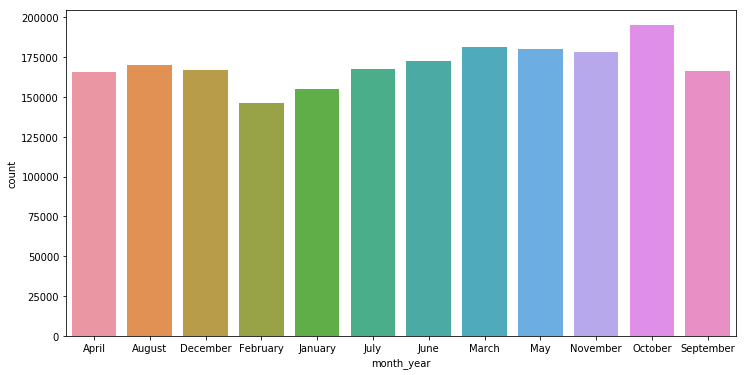

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(x="month_year", y="count", data=M1);

Impact of season of week in all infractions

In [92]:
S1=R2.groupby('season')['infraction_description'].count().reset_index(name="count")
S1

,season,count
0,Fall,539034
1,Spring,527444
2,Summer,510036
3,Winter,467774


Distribution of infractions by day of week

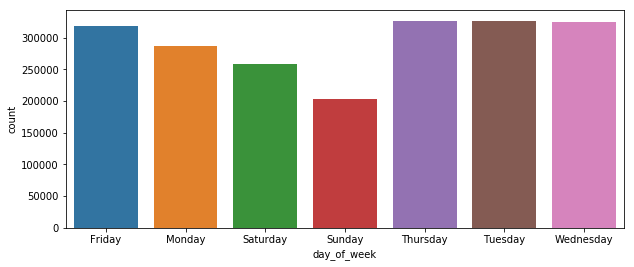

In [96]:
plt.figure(figsize=(10,4))
sns.barplot(x="day_of_week", y="count", data=D1);

Distribution of infractions by season

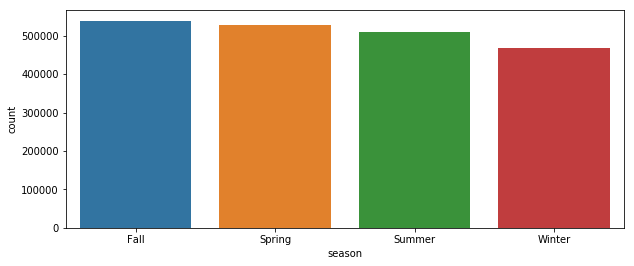

In [95]:
plt.figure(figsize=(10,4))
sns.barplot(x="season", y="count", data=S1);

Distribution of top 20 infractions by fines

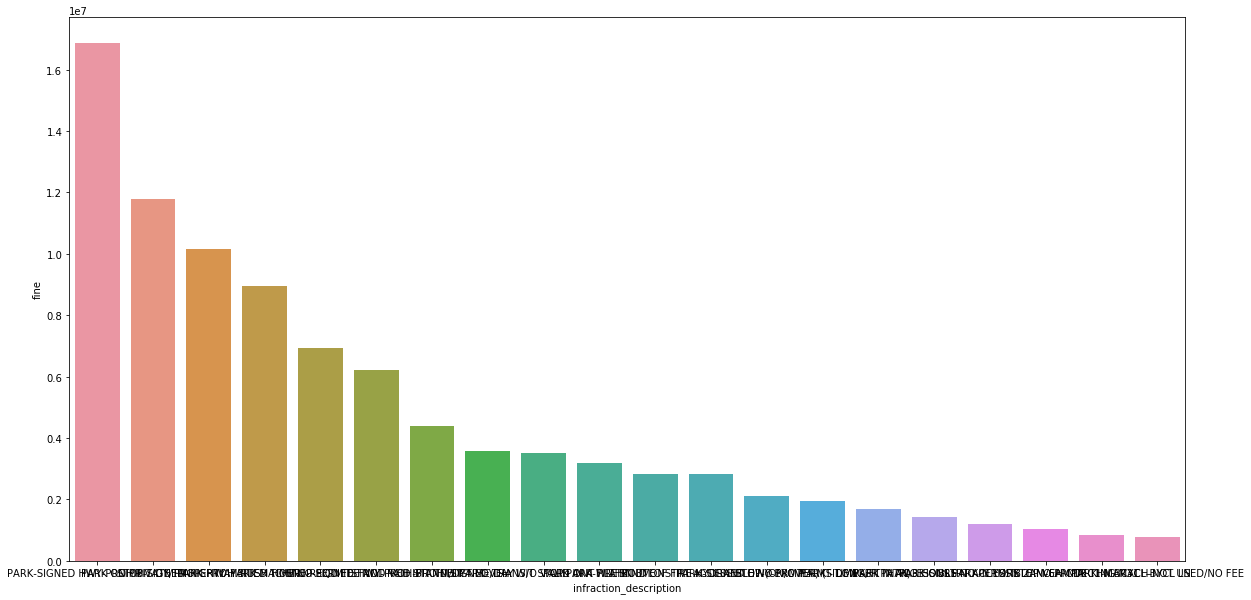

In [104]:
F1=R2.groupby('infraction_description')['set_fine_amount'].sum().sort_values(ascending=False).reset_index(name='fine').head(20)
plt.figure(figsize=(20,10))
sns.barplot(x="infraction_description", y="fine", data=F1);

# Check Readme file for green Parking Dataset and importing JSON file for green parking from Open Data Website URL

In [ ]:
GP = pd.read_excel(r'C:\Users\NAVJOT\Desktop\PAIE_Job_search\OCT 2019\City of troronto\Green parking\green-p-parking-readme.xls',)
GP.head()

import urllib.request, json 
with urllib.request.urlopen("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b66466c3-69c8-4825-9c8b-04b270069193/resource/059cde7d-21bc-4f24-a533-6c2c3fc33ef1/download/green-p-parking-2019.json") as url:
    data = json.loads(url.read().decode())
print(data)

# Plotting WARDS on MAP

In [27]:
sf = shp.Reader(r"C:\Users\NAVJOT\Desktop\PAIE_Job_search\OCT 2019\City of troronto\WARD\WARD_WGS84.shp")

In [28]:
%matplotlib inline

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [29]:
len(sf.shapes())

25

In [30]:
sf.records()[1]

Record #1: [2551044, 'WD18', '03', '03', 'Etobicoke-Lakeshore', 303099.474, 4831000.0, -79.52087, 43.6216461188]

In [31]:
sf.records()[1][5]

303099.474

In [39]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\NAVJOT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


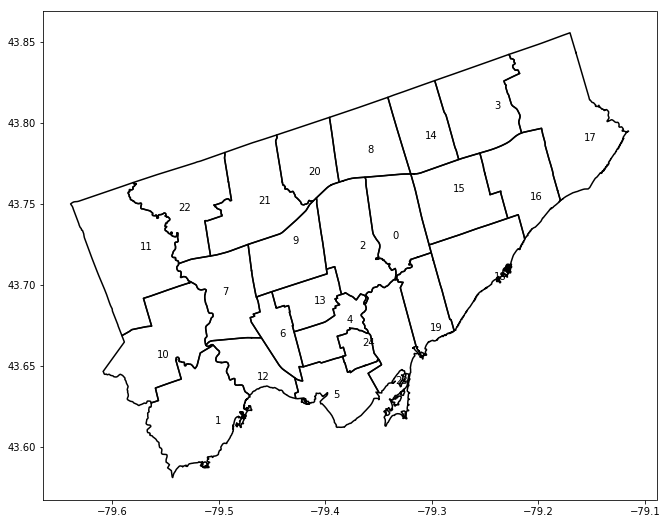

In [40]:
plot_map(sf)